# Predicción de tarifas de taxis

In [52]:
# Importando librerías
import pandas as pd
import numpy as np
import warnings
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# Ignoramos los futuros warnings
warnings.filterwarnings("ignore")

In [148]:
# Cargando datos

'''
    Aquí cada uno escribira su propia ruta para no subir el archivo dado que es demasiado pasado
'''

# Ruta de Danilo
#nombre_archivo ='../../PracticaCalificada2-CC421/train.csv'

# Ruta de Victor
nombre_archivo ='D:/Nueva carpeta (4)/UNI-21-I/IA/PracticaCalificada2-CC421/PracticaCalificada2-CC421/train.csv'

# Ruta de William
#nombre_archivo ='../train.csv'

# Ruta de Bryan
#nombre_archivo ='../train.csv'


# Cargando los datos
# Estoy usando una menor cantidad de data ya que mi hardware no soporta los 55 millones de datos y demora mucho varias veces 
# Si se desea trabajar con toda la data completa borrar nrows = 1000000  un millon de datos
df = pd.read_csv(nombre_archivo)
df = df.sample(100000, random_state = 5, replace = True)



## 1. Análisis de Datos

In [55]:
# Visualización de los 30 primeros datos
df.head(30)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2


In [56]:
# Cantidad de instancias y atributos (filas x columndas)

print("Cantidad de Instancias: "+str(df.shape[0]))
print("Cantidad de Atributos: "+str(df.shape[1]))

Cantidad de Instancias: 1000000
Cantidad de Atributos: 8


In [57]:
# Visualización de los tipos de datos del dataframe
df.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [58]:
# Descripción actual de algunas mediciones 
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1000000.000000,1000000.000000,1000000.000000,999990.000000,999990.000000,1000000.000000
mean,11.348079,-72.526640,39.929008,-72.527860,39.919954,1.684924
std,9.822090,12.057937,7.626154,11.324494,8.201418,1.323911
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


In [59]:
# Verificando la correlación de las caracteristicas

'''
    Nota: Necesitan ser trabajadas dando que hay mucha dependencia entre características y poca correlación
        con la característica a predecir.
'''

df.corr(method='pearson')

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.008740,-0.007676,0.009644,-0.007629,0.012801
pickup_longitude,0.008740,1.000000,-0.529033,0.786037,-0.638188,0.000023
pickup_latitude,-0.007676,-0.529033,1.000000,-0.725437,0.455654,-0.001138
dropoff_longitude,0.009644,0.786037,-0.725437,1.000000,-0.511984,0.000680
dropoff_latitude,-0.007629,-0.638188,0.455654,-0.511984,1.000000,-0.000194
passenger_count,0.012801,0.000023,-0.001138,0.000680,-0.000194,1.000000


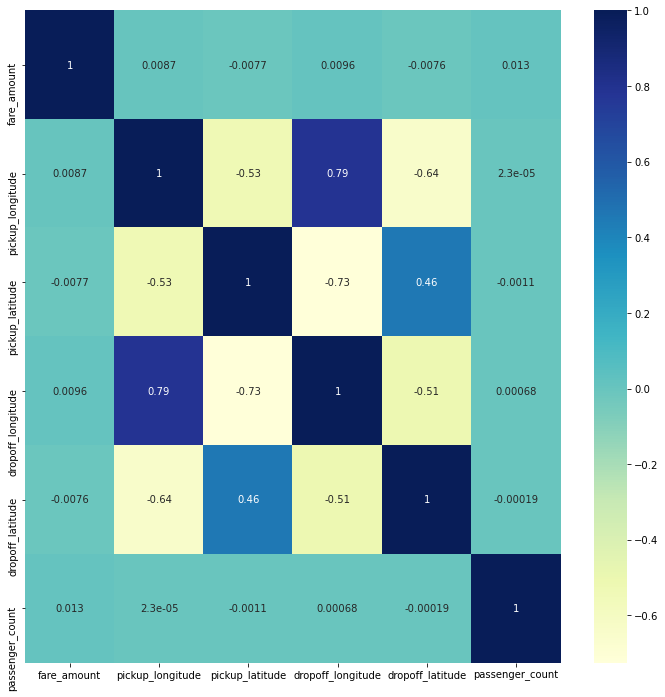

In [60]:
plt.figure(figsize=(12,12))

correlacion = df.corr(method='pearson')

sns.heatmap(correlacion, annot=True,  cmap="YlGnBu")
plt.show()

In [61]:
# Verificando la cantidad de datos corrompidos o nulos

df.isnull().sum()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    10
dropoff_latitude     10
passenger_count       0
dtype: int64

In [62]:
df.sort_values('pickup_datetime')

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
880228,2009-01-01 00:00:46.0000002,15.0,2009-01-01 00:00:46 UTC,-73.953738,40.806762,-73.989427,40.769542,1
661006,2009-01-01 00:01:04.0000001,5.8,2009-01-01 00:01:04 UTC,-73.995133,40.734111,-73.998232,40.722874,2
756707,2009-01-01 00:11:42.0000002,29.4,2009-01-01 00:11:42 UTC,-73.959992,40.773613,-73.821503,40.861338,2
745620,2009-01-01 00:12:02.0000004,7.4,2009-01-01 00:12:02 UTC,-73.959527,40.771260,-73.967503,40.787736,1
964259,2009-01-01 00:20:31.00000010,7.4,2009-01-01 00:20:31 UTC,-73.988451,40.746666,-73.989793,40.726512,1
...,...,...,...,...,...,...,...,...
286276,2015-06-30 23:38:21.0000003,26.5,2015-06-30 23:38:21 UTC,-74.008385,40.711571,-73.884071,40.737385,5
955575,2015-06-30 23:45:57.0000003,4.0,2015-06-30 23:45:57 UTC,-74.002342,40.739819,-74.005829,40.745239,1
915826,2015-06-30 23:48:35.0000005,30.5,2015-06-30 23:48:35 UTC,-73.983826,40.729546,-73.927917,40.661186,2
751350,2015-06-30 23:53:23.0000002,3.5,2015-06-30 23:53:23 UTC,-73.978020,40.757439,-73.980705,40.753544,1


## 2. Procesamiento de Datos

In [63]:
# Eliminamos 'key' ya que esta característica no aporta información relevante
df.drop(columns=['key'], inplace=True)
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...
999995,7.0,2014-09-13 21:44:38 UTC,-73.976676,40.785630,-73.959196,40.775114,1
999996,7.3,2010-09-20 14:50:37 UTC,-73.992103,40.671385,-73.992103,40.671385,2
999997,10.5,2013-04-26 14:03:00 UTC,-73.978423,40.751135,-73.993397,40.762197,5
999998,6.9,2011-07-08 00:29:00 UTC,-73.980317,40.759482,-73.976832,40.743122,1


In [64]:
# Eliminaremos los datos nulos y duplicados dado que la cantidad de estos es insignificante para la población

df_new = df.drop_duplicates()
df_new.dropna(inplace=True)
df_new

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...
999995,7.0,2014-09-13 21:44:38 UTC,-73.976676,40.785630,-73.959196,40.775114,1
999996,7.3,2010-09-20 14:50:37 UTC,-73.992103,40.671385,-73.992103,40.671385,2
999997,10.5,2013-04-26 14:03:00 UTC,-73.978423,40.751135,-73.993397,40.762197,5
999998,6.9,2011-07-08 00:29:00 UTC,-73.980317,40.759482,-73.976832,40.743122,1


In [65]:
'''
    Tareas:
    -Analizar las características individualmente, con el fin de saber si hay outliers, además se podría ver
    esto con gráficas de boxplot.
    -Actualmente las características no son buenas, la latitud y longitud podrían darnos nuevas características
    que sirvan mejor para las predicciones.
    -La característica datatime actualmente es de clase objeto podemos darle un mejor uso si dividimos en año y
    horas o como crean convenientes.
'''

'\n    Tareas:\n    -Analizar las características individualmente, con el fin de saber si hay outliers, además se podría ver\n    esto con gráficas de boxplot.\n    -Actualmente las características no son buenas, la latitud y longitud podrían darnos nuevas características\n    que sirvan mejor para las predicciones.\n    -La característica datatime actualmente es de clase objeto podemos darle un mejor uso si dividimos en año y\n    horas o como crean convenientes.\n'

## 3. Tratamiento de Datos

In [66]:
import datetime
##separamos los dias meses años y horas 
## Se cita https://stackoverflow.com/questions/53914889/extract-day-of-month-as-array-from-datetime-column

df_new['pickup_datetime'] = pd.to_datetime(df_new['pickup_datetime'], errors='coerce')
df_new['day']=df_new['pickup_datetime'].dt.day.values
df_new['month']=df_new['pickup_datetime'].dt.month.values
df_new['year']=df_new['pickup_datetime'].dt.year.values
df_new['hours']=df_new['pickup_datetime'].dt.hour.values



In [67]:

##observamos que hay pasajeros =0 , no deberia ocurrir
df_new.groupby("passenger_count")["passenger_count"].count()


passenger_count
0        3555
1      691344
2      148105
3       43765
4       21429
5       70595
6       21196
208         1
Name: passenger_count, dtype: int64

In [68]:

## limpiamos la data , especificamente cuendo hay pasajeros = 0

df_new2=df_new[(df_new["passenger_count"]> 0) & (df_new["passenger_count"] <=6)]
df_new3=df_new2[(df_new2["fare_amount"]> 2.0) & (df_new2["fare_amount"]<= 150.0)]
df_new4=df_new3[(df_new3["pickup_longitude"] !=0.0)] 
df_new4.reset_index(drop=True, inplace=True)
df_new4

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,hours
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,15,6,2009,17
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,5,1,2010,16
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,18,8,2011,0
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,21,4,2012,4
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,9,3,2010,7
...,...,...,...,...,...,...,...,...,...,...,...
977541,7.0,2014-09-13 21:44:38+00:00,-73.976676,40.785630,-73.959196,40.775114,1,13,9,2014,21
977542,7.3,2010-09-20 14:50:37+00:00,-73.992103,40.671385,-73.992103,40.671385,2,20,9,2010,14
977543,10.5,2013-04-26 14:03:00+00:00,-73.978423,40.751135,-73.993397,40.762197,5,26,4,2013,14
977544,6.9,2011-07-08 00:29:00+00:00,-73.980317,40.759482,-73.976832,40.743122,1,8,7,2011,0


In [69]:
df_new4["fare_amount"]


0          4.5
1         16.9
2          5.7
3          7.7
4          5.3
          ... 
977541     7.0
977542     7.3
977543    10.5
977544     6.9
977545     4.1
Name: fare_amount, Length: 977546, dtype: float64

In [70]:
#Eliminamos filas con longitud y latitud fuera de rango
#longitudd: -180 a +180
#latitud: -90 a +90

df_new5=df_new4[(df_new4["pickup_longitude"]>= -180.0) & (df_new4["pickup_longitude"] <=180.0)]
df_new6=df_new5[(df_new5["pickup_latitude"]>= -90.0) & (df_new5["pickup_latitude"]<= 90.0)]

df_new7=df_new6[(df_new6["dropoff_longitude"]>= -180.0) & (df_new6["dropoff_longitude"] <=180.0)]
df_new8=df_new7[(df_new7["dropoff_latitude"]>= -90.0) & (df_new7["dropoff_latitude"]<= 90.0)]

df_new8.reset_index(drop=True, inplace=True)
df_new8.head(30)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,hours
0,4.50,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,15,6,2009,17
1,16.90,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,5,1,2010,16
2,5.70,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,18,8,2011,0
3,7.70,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,21,4,2012,4
4,5.30,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,9,3,2010,7
5,12.10,2011-01-06 09:50:45+00:00,-74.000964,40.731630,-73.972892,40.758233,1,6,1,2011,9
6,7.50,2012-11-20 20:35:00+00:00,-73.980002,40.751662,-73.973802,40.764842,1,20,11,2012,20
7,16.50,2012-01-04 17:22:00+00:00,-73.951300,40.774138,-73.990095,40.751048,1,4,1,2012,17
8,9.00,2012-12-03 13:10:00+00:00,-74.006462,40.726713,-73.993078,40.731628,1,3,12,2012,13
9,8.90,2009-09-02 01:11:00+00:00,-73.980658,40.733873,-73.991540,40.758138,2,2,9,2009,1


In [71]:
## Con la data ya mas limpia mostramos un resumen de los datos
df_new8.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,hours
count,977546.000000,977546.000000,977546.000000,977546.000000,977546.000000,977546.00000,977546.000000,977546.000000,977546.000000,977546.000000
mean,11.328396,-73.914686,40.693936,-73.854438,40.649233,1.69136,15.695562,6.269630,2011.741215,13.509229
std,9.547785,6.762698,4.263370,5.720663,6.245291,1.30664,8.681980,3.436508,1.865577,6.511958
min,2.500000,-3377.680935,-880.627428,-3383.296608,-3114.338567,1.00000,1.000000,1.000000,2009.000000,0.000000
25%,6.000000,-73.992267,40.736523,-73.991559,40.735441,1.00000,8.000000,3.000000,2010.000000,9.000000
50%,8.500000,-73.982075,40.753382,-73.980558,40.753815,1.00000,16.000000,6.000000,2012.000000,14.000000
75%,12.500000,-73.968268,40.767561,-73.965183,40.768397,2.00000,23.000000,9.000000,2013.000000,19.000000
max,150.000000,2522.271325,2621.628430,45.581619,1651.553433,6.00000,31.000000,12.000000,2015.000000,23.000000


In [147]:
## Se cita https://stackoverflow.com/questions/27928/calculate-distance-between-two-latitude-longitude-points-haversine-formula
## Hallamos una distancia para poder aprovecharr la latitud y longitud y trabajar con la distancia
from math import radians,cos,sin,asin,atan2

def distance(lonx,lony,latx,laty):
    lonx =np.radians(lonx)
    lony =np.radians(lony)
    latx =np.radians(latx)
    laty =np.radians(laty)

    d_lon=(lony-lonx)
    d_lat=(laty-latx)
    a = sin(d_lat/2.0)**2+cos(latx)*cos(laty)*sin(d_lon/2.0)**2
    c = 2 * asin(a**(1/2))
    
    ##distancia William
    #a = sin(d_lat/2)**2+cos(latx)*cos(laty)*sin(d_lon/2)**2
    #a=sin(latx)*sin(laty)+(sin(latx)*sin(laty)*cos(d_lon))
    #c = 2 * atan2(a**(1/2),(1-a)**2)
    #r=6378.0
    #distancia=round(r*c,2)
    #return(distancia)
    
    distancia=round(6371*c,2)
    return(distancia)

    #a = sin(d_lat/2)**2+cos(latx)*cos(laty)*sin(d_lon/2)**2
    #a=sin(latx)*sin(laty)+(sin(latx)*sin(laty)*cos(d_lon))
    #c = 2 * atan2(a**(1/2),(1-a)**2)



dis=[]


for i in range(df_new8.shape[0]):
    dis.append(distance(df_new8["pickup_longitude"][i],
                        df_new8["dropoff_longitude"][i],
                        df_new8["pickup_latitude"][i],
                        df_new8["dropoff_latitude"][i]))


df_new8["distancia"] = dis
df_new8


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,hours,distancia
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,15,6,2009,17,1.03
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,5,1,2010,16,8.45
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,18,8,2011,0,1.39
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,21,4,2012,4,2.80
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,9,3,2010,7,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...
977502,7.0,2014-09-13 21:44:38+00:00,-73.976676,40.785630,-73.959196,40.775114,1,13,9,2014,21,1.88
977503,7.3,2010-09-20 14:50:37+00:00,-73.992103,40.671385,-73.992103,40.671385,2,20,9,2010,14,0.00
977504,10.5,2013-04-26 14:03:00+00:00,-73.978423,40.751135,-73.993397,40.762197,5,26,4,2013,14,1.76
977505,6.9,2011-07-08 00:29:00+00:00,-73.980317,40.759482,-73.976832,40.743122,1,8,7,2011,0,1.84


In [133]:
df_new9=df_new8[(df_new8["distancia"] !=0.0)] 
df_new9.reset_index(drop=True, inplace=True)
df_new9

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,hours,distancia
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,15,6,2009,17,1.03
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,5,1,2010,16,8.45
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,18,8,2011,0,1.39
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,21,4,2012,4,2.80
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,9,3,2010,7,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...
965185,20.0,2014-06-29 22:57:55+00:00,-73.872919,40.774106,-73.796524,40.775041,2,29,6,2014,22,6.43
965186,7.0,2014-09-13 21:44:38+00:00,-73.976676,40.785630,-73.959196,40.775114,1,13,9,2014,21,1.88
965187,10.5,2013-04-26 14:03:00+00:00,-73.978423,40.751135,-73.993397,40.762197,5,26,4,2013,14,1.76
965188,6.9,2011-07-08 00:29:00+00:00,-73.980317,40.759482,-73.976832,40.743122,1,8,7,2011,0,1.84


In [134]:
# con esto vemos si alguna de nuestras columnas estan mal o salen de los parametros
df_new9.groupby("year")["year"].count() 

year
2009    149664
2010    145453
2011    150756
2012    154092
2013    152136
2014    144950
2015     68139
Name: year, dtype: int64

Text(0, 0.5, 'Frecuencia')

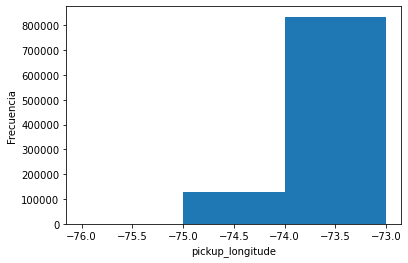

In [135]:
#f, axes = plt.subplots(figsize = (16,16))
#sns.distplot((df_new8['pickup_longitude']>= -80) & (df_new8['pickup_longitude'] <-70 ))

df_new9["pickup_longitude"].plot.hist(alpha=1, stacked=True, bins=list(range(-76, -72, 1)))
plt.xlabel("pickup_longitude")
plt.ylabel("Frecuencia")

#filtered = df_new8[(df_new8['pickup_longitude']>= -80) & (df_new8['pickup_longitude'] <-70 )]
#sns.distplot(filtered, kde=True, hist=True, kde_kws={"clip":(-80,-70)}, hist_kws={"range":(-80,-70)})
#plt.show()

In [136]:
df_new10=df_new9[(df_new9["pickup_longitude"]>= -76.0) & (df_new4["pickup_longitude"] <=-72.0)]
#df_new6=df_new5[(df_new5["pickup_latitude"]>= -90.0) & (df_new5["pickup_latitude"]<= 90.0)]

#df_new7=df_new6[(df_new6["dropoff_longitude"]>= -180.0) & (df_new6["dropoff_longitude"] <=180.0)]
#df_new8=df_new7[(df_new7["dropoff_latitude"]>= -90.0) & (df_new7["dropoff_latitude"]<= 90.0)]

df_new10.reset_index(drop=True, inplace=True)
df_new10

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,hours,distancia
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,15,6,2009,17,1.03
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,5,1,2010,16,8.45
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,18,8,2011,0,1.39
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,21,4,2012,4,2.80
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,9,3,2010,7,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...
964488,20.0,2014-06-29 22:57:55+00:00,-73.872919,40.774106,-73.796524,40.775041,2,29,6,2014,22,6.43
964489,7.0,2014-09-13 21:44:38+00:00,-73.976676,40.785630,-73.959196,40.775114,1,13,9,2014,21,1.88
964490,10.5,2013-04-26 14:03:00+00:00,-73.978423,40.751135,-73.993397,40.762197,5,26,4,2013,14,1.76
964491,6.9,2011-07-08 00:29:00+00:00,-73.980317,40.759482,-73.976832,40.743122,1,8,7,2011,0,1.84


Text(0, 0.5, 'Frecuencia')

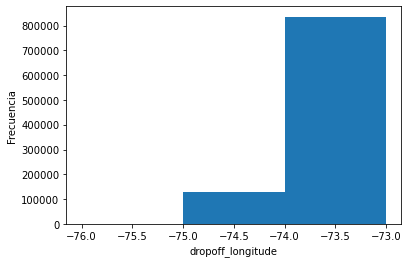

In [137]:
#f, axes = plt.subplots(figsize = (16,16))
#sns.distplot(df_new8['dropoff_longitude'])

df_new9["dropoff_longitude"].plot.hist(alpha=1, stacked=True, bins=list(range(-76, -72, 1)))
plt.xlabel("dropoff_longitude")
plt.ylabel("Frecuencia")



In [138]:
#df_new10=df_new9[(df_new9["pickup_longitude"]>= -76.0) & (df_new4["pickup_longitude"] <=-72.0)]
#df_new6=df_new5[(df_new5["pickup_latitude"]>= -90.0) & (df_new5["pickup_latitude"]<= 90.0)]

df_new11=df_new10[(df_new10["dropoff_longitude"]>= -76.0) & (df_new10["dropoff_longitude"] <=-72.0)]
#df_new8=df_new7[(df_new7["dropoff_latitude"]>= -90.0) & (df_new7["dropoff_latitude"]<= 90.0)]

df_new11.reset_index(drop=True, inplace=True)
df_new11

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,hours,distancia
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,15,6,2009,17,1.03
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,5,1,2010,16,8.45
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,18,8,2011,0,1.39
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,21,4,2012,4,2.80
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,9,3,2010,7,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...
962988,20.0,2014-06-29 22:57:55+00:00,-73.872919,40.774106,-73.796524,40.775041,2,29,6,2014,22,6.43
962989,7.0,2014-09-13 21:44:38+00:00,-73.976676,40.785630,-73.959196,40.775114,1,13,9,2014,21,1.88
962990,10.5,2013-04-26 14:03:00+00:00,-73.978423,40.751135,-73.993397,40.762197,5,26,4,2013,14,1.76
962991,6.9,2011-07-08 00:29:00+00:00,-73.980317,40.759482,-73.976832,40.743122,1,8,7,2011,0,1.84


Text(0, 0.5, 'Frecuencia')

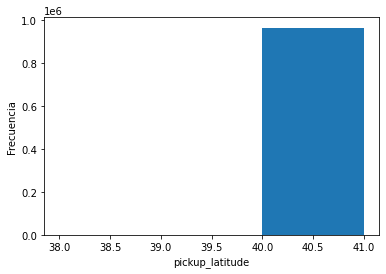

In [139]:
#f, axes = plt.subplots(figsize = (16,16))
#sns.distplot(df_new9['pickup_latitude'])

df_new9["pickup_latitude"].plot.hist(alpha=1, stacked=True, bins=list(range(38, 42, 1)))
plt.xlabel("pickup_latitude")
plt.ylabel("Frecuencia")

In [140]:
#df_new10=df_new9[(df_new9["pickup_longitude"]>= -76.0) & (df_new4["pickup_longitude"] <=-72.0)]
df_new12=df_new11[(df_new11["pickup_latitude"]>= 38.0) & (df_new11["pickup_latitude"]<= 42.0)]

#df_new7=df_new6[(df_new6["dropoff_longitude"]>= -180.0) & (df_new6["dropoff_longitude"] <=180.0)]
#df_new8=df_new7[(df_new7["dropoff_latitude"]>= -90.0) & (df_new7["dropoff_latitude"]<= 90.0)]

df_new12.reset_index(drop=True, inplace=True)
df_new12

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,hours,distancia
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,15,6,2009,17,1.03
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,5,1,2010,16,8.45
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,18,8,2011,0,1.39
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,21,4,2012,4,2.80
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,9,3,2010,7,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...
962943,20.0,2014-06-29 22:57:55+00:00,-73.872919,40.774106,-73.796524,40.775041,2,29,6,2014,22,6.43
962944,7.0,2014-09-13 21:44:38+00:00,-73.976676,40.785630,-73.959196,40.775114,1,13,9,2014,21,1.88
962945,10.5,2013-04-26 14:03:00+00:00,-73.978423,40.751135,-73.993397,40.762197,5,26,4,2013,14,1.76
962946,6.9,2011-07-08 00:29:00+00:00,-73.980317,40.759482,-73.976832,40.743122,1,8,7,2011,0,1.84


Text(0, 0.5, 'Frecuencia')

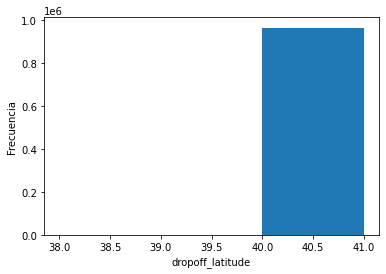

In [141]:
#f, axes = plt.subplots(figsize = (16,16))
#sns.distplot(df_new9['dropoff_latitude'])

df_new9["dropoff_latitude"].plot.hist(alpha=1, stacked=True, bins=list(range(38, 42, 1)))
plt.xlabel("dropoff_latitude")
plt.ylabel("Frecuencia")

In [142]:
#df_new10=df_new9[(df_new9["pickup_longitude"]>= -76.0) & (df_new4["pickup_longitude"] <=-72.0)]
#df_new6=df_new5[(df_new5["pickup_latitude"]>= -90.0) & (df_new5["pickup_latitude"]<= 90.0)]

#df_new7=df_new6[(df_new6["dropoff_longitude"]>= -180.0) & (df_new6["dropoff_longitude"] <=180.0)]
df_new13=df_new12[(df_new12["dropoff_latitude"]>= 38.0) & (df_new12["dropoff_latitude"]<= 42.0)]

df_new13.reset_index(drop=True, inplace=True)
df_new13

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,hours,distancia
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,15,6,2009,17,1.03
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,5,1,2010,16,8.45
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,18,8,2011,0,1.39
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,21,4,2012,4,2.80
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,9,3,2010,7,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...
962910,20.0,2014-06-29 22:57:55+00:00,-73.872919,40.774106,-73.796524,40.775041,2,29,6,2014,22,6.43
962911,7.0,2014-09-13 21:44:38+00:00,-73.976676,40.785630,-73.959196,40.775114,1,13,9,2014,21,1.88
962912,10.5,2013-04-26 14:03:00+00:00,-73.978423,40.751135,-73.993397,40.762197,5,26,4,2013,14,1.76
962913,6.9,2011-07-08 00:29:00+00:00,-73.980317,40.759482,-73.976832,40.743122,1,8,7,2011,0,1.84


Text(0, 0.5, 'Frecuencia')

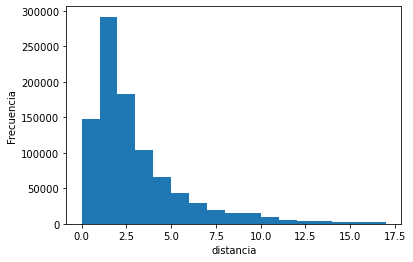

In [143]:
#f, axes = plt.subplots(figsize = (16,16))
#sns.distplot(df_new9['distancia'])

df_new9["distancia"].plot.hist(alpha=1, stacked=True, bins=list(range(0, 18, 1)))
plt.xlabel("distancia")
plt.ylabel("Frecuencia")

In [144]:
df_new14=df_new13[(df_new8["distancia"] >0.0) & (df_new8["distancia"] <=18.0) ] 
df_new14.reset_index(drop=True, inplace=True)
df_new14.head(50)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,hours,distancia
0,4.50,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,15,6,2009,17,1.03
1,16.90,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,5,1,2010,16,8.45
2,5.70,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,18,8,2011,0,1.39
3,7.70,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,21,4,2012,4,2.80
4,5.30,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,9,3,2010,7,2.00
5,12.10,2011-01-06 09:50:45+00:00,-74.000964,40.731630,-73.972892,40.758233,1,6,1,2011,9,3.79
6,7.50,2012-11-20 20:35:00+00:00,-73.980002,40.751662,-73.973802,40.764842,1,20,11,2012,20,1.56
7,16.50,2012-01-04 17:22:00+00:00,-73.951300,40.774138,-73.990095,40.751048,1,4,1,2012,17,4.16
8,9.00,2012-12-03 13:10:00+00:00,-74.006462,40.726713,-73.993078,40.731628,1,3,12,2012,13,1.25
9,8.90,2009-09-02 01:11:00+00:00,-73.980658,40.733873,-73.991540,40.758138,2,2,9,2009,1,2.85


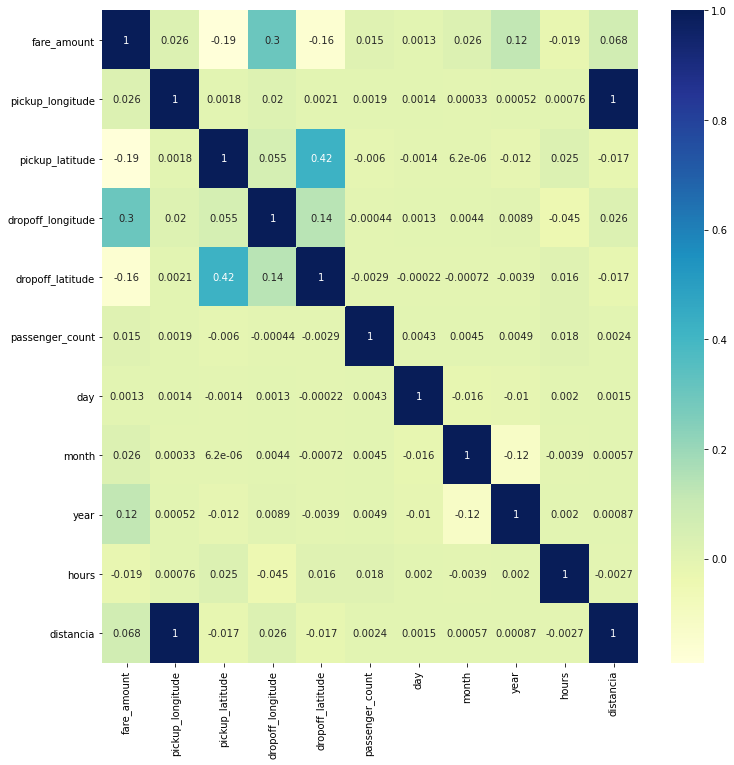

In [145]:
plt.figure(figsize=(12,12))

correlacion = df_new14.corr(method='pearson')

sns.heatmap(correlacion, annot=True,  cmap="YlGnBu")
plt.show()

## 4. Modelamiento

In [146]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, average_precision_score, precision_recall_curve
 

X=df_new14[["distancia","passenger_count"]]
#"passenger_count"
y=df_new14[["fare_amount"]]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,
    random_state=0)


X_train.shape, X_test.shape

clf = LinearRegression()
clf.fit(X_train, y_train)

score = clf.score(X_train,y_train)
 
print("Metrica del modelo", score)

#scores = cross_val_score(clf, X_train, y_train,scoring="accuracy")
#print("Metricas cross_validation", scores)


Metrica del modelo 0.00494782425300222


## 5. Optimización y forecasting